## Observations and Insights

## Dependencies and starter code

In [ ]:
# %matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
metadata_results_combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

metadata_results_combined_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

## Summary statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = metadata_results_combined_df.groupby(['Drug Regimen'])
volume_summary = regimen_group['Tumor Volume (mm3)'].mean()
volume_summary_df = pd.DataFrame(volume_summary)
volume_summary_df = volume_summary_df.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume (mm3)'})
volume_summary_df['Median Tumor Volume (mm3)'] = regimen_group['Tumor Volume (mm3)'].median()
volume_summary_df['Variance Tumor Volume (mm3)'] = regimen_group['Tumor Volume (mm3)'].var()
volume_summary_df['Stand. Dev. Tumor Volume (mm3)'] = regimen_group['Tumor Volume (mm3)'].std()
volume_summary_df['SEM Tumor Volume (mm3)'] = regimen_group['Tumor Volume (mm3)'].sem()
volume_summary_df

Mean Tumor Volume (mm3)  Median Tumor Volume (mm3)  \
Drug Regimen                                                       
Capomulin                   40.675741                  41.557809   
Ceftamin                    52.591172                  51.776157   
Infubinol                   52.884795                  51.820584   
Ketapril                    55.235638                  53.698743   
Naftisol                    54.331565                  52.509285   
Placebo                     54.033581                  52.288934   
Propriva                    52.322552                  50.854632   
Ramicane                    40.216745                  40.673236   
Stelasyn                    54.233149                  52.431737   
Zoniferol                   53.236507                  51.818479   

              Variance Tumor Volume (mm3)  Stand. Dev. Tumor Volume (mm3)  \
Drug Regimen                                                                
Capomulin                       24.947764                        4.994774   
Ceftamin                        39.290177                        6.268188   
Infubinol                       43.128684                        6.567243   
Ketapril                        68.553577                        8.279709   
Naftisol                        66.173479                        8.134708   
Placebo                         61.168083                        7.821003   
Propriva                        42.351070                        6.507770   
Ramicane                        23.486704                        4.846308   
Stelasyn                        59.450562                        7.710419   
Zoniferol                       48.533355                        6.966589   

              SEM Tumor Volume (mm3)  
Drug Regimen                          
Capomulin                   0.329346  
Ceftamin                    0.469821  
Infubinol                   0.492236  
Ketapril                    0.603860  
Naftisol                    0.596466  
Placebo                     0.581331  
Propriva                    0.512884  
Ramicane                    0.320955  
Stelasyn                    0.573111  
Zoniferol                   0.516398

## Bar plots

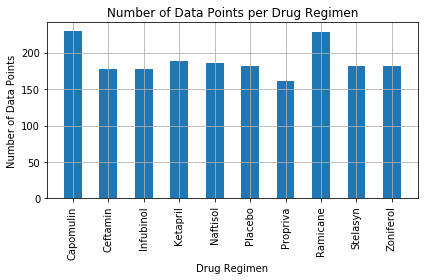

In [41]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

number_of_data_points = regimen_group['Tumor Volume (mm3)'].count()
drug_regimen = volume_summary_df.index.values.tolist()
x_axis = np.arange(len(drug_regimen))

plt.bar(x_axis, number_of_data_points, tick_label=drug_regimen, width=.5)
plt.xticks(rotation='vertical')
plt.title('Number of Data Points per Drug Regimen')
plt.ylabel('Number of Data Points')
plt.xlabel('Drug Regimen')
plt.grid()
plt.tight_layout()

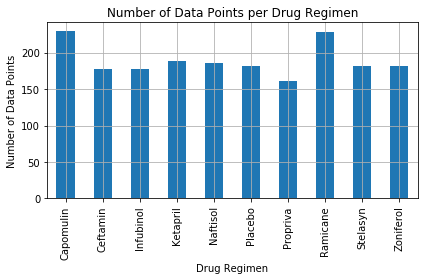

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_point_count_df = pd.DataFrame(number_of_data_points)

Count_PDPlot = data_point_count_df.plot(kind='bar', grid=True, legend=False)
plt.title('Number of Data Points per Drug Regimen')
Count_PDPlot.set_ylabel('Number of Data Points')
plt.tight_layout()

## Pie plots

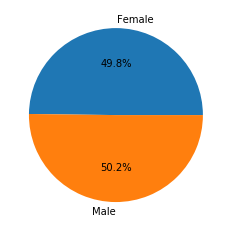

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
unique_mouse = metadata_results_combined_df.drop_duplicates(subset=['Mouse ID'], keep='last')
sex_ratio_group = unique_mouse.groupby(['Sex']).count()

sex_ratio_df = pd.DataFrame(sex_ratio_group['Mouse ID'])
sex_ratio = list(sex_ratio_df['Mouse ID'])
labels = sex_ratio_df.index.values.tolist()

Ratio_MPLPlot = plt.pie(sex_ratio, labels=labels, autopct='%1.1f%%')


Text(0, 0.5, '')

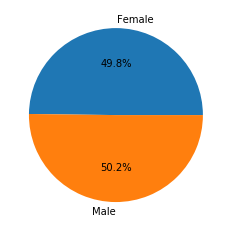

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_ratio_df
gender_list = sex_ratio_df.keys()

Ratio_PDPlot = sex_ratio_df.plot(kind='pie', y=gender_list, legend=False, autopct='%1.1f%%')
Ratio_PDPlot.set_ylabel('')
# plt.title('Female to Male Ratio')

## Quartiles, outliers and boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Capomulin, Ramicane, Infubinol, and Ceftamin.
metadata_results_combined_df
prom_regimens = metadata_results_combined_df[metadata_results_combined_df['Drug Regimen']
                                             .isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])] 
final_volume = prom_regimens.groupby(['Mouse ID']).tail(1)
final_volume = final_volume.sort_values(by=['Tumor Volume (mm3)'])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_volume['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of The Final Tumor Volume is : {lowerq} (mm3).")
print(f"The upper quartile of The Final Tumor Volume is : {upperq} (mm3).")
print(f"The interquaritle range of The Final Tumor Volume is : {iqr} (mm3).")
print(f"The the median of The Final Tumor Volume is : {quartiles[0.5]} (mm3).")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliners.")
print(f"Values above {upper_bound} could be outliners.")

max_tumor_volume = float(final_volume['Tumor Volume (mm3)'].tail(1))
min_tumor_volume = float(final_volume['Tumor Volume (mm3)'].head(1))

print(f"The maximum Final Tumor Volume is {max_tumor_volume} (mm3).")
print(f"The minimum Final Tumor Volume is {min_tumor_volume} (mm3).")

print("Therefore, there are no outliners.")

The lower quartile of The Final Tumor Volume is : 37.187743802499995 (mm3).
The upper quartile of The Final Tumor Volume is : 59.930261755000004 (mm3).
The interquaritle range of The Final Tumor Volume is : 22.74251795250001 (mm3).
The the median of The Final Tumor Volume is : 45.0 (mm3).
Values below 3.0739668737499812 could be outliners.
Values above 94.04403868375002 could be outliners.
The maximum Final Tumor Volume is 72.2267309 (mm3).
The minimum Final Tumor Volume is 22.05012627 (mm3).
Therefore, there are no outliners.


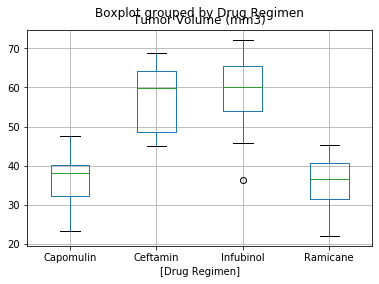

In [84]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplot = final_volume.boxplot(by=['Drug Regimen'], column=['Tumor Volume (mm3)'])
# plt.title("Final Tumor Volume")
# final_volume


## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulin_df = metadata_results_combined_df.loc[metadata_results_combined_df['Drug Regimen']=='Capomulin']
Capomulin_df

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen